Enter gender (Male/Female): 0
Enter height (in cm): 155
Enter index (0-5): 3

--- Model Performance ---
Pseudo-Accuracy (within tolerance of 5 kg): 0.30
Mean Squared Error: 254.14

--- Prediction ---
Gender: 0
Index: 3
Actual Weight: 71
Predicted Weight: 73.72874772227217


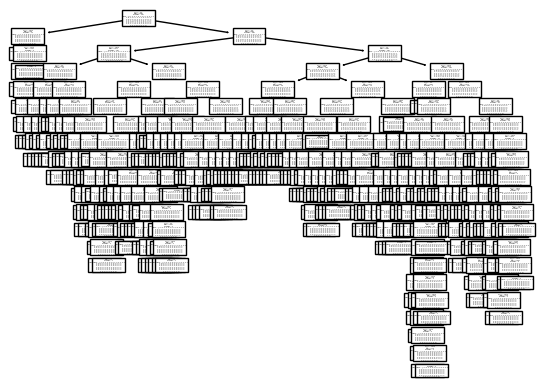

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, mean_squared_error

# Load the dataset
df = pd.read_csv('Weight prediction dataset.csv')
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

# Split the data into features (X) and target (Y)
X = df.drop(columns=['Weight'])
Y = df['Weight']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Train the DecisionTreeClassifier (not used for prediction, kept for potential future use)
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
joblib.dump(model, 'weight_prediction_model.joblib')

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVR model for weight prediction
svm_model = SVR(kernel='linear', C=1.0)
svm_model.fit(X_train_scaled, Y_train) # Fit the SVR model to the training data

# Predict on the test set to calculate metrics
y_pred_test = svm_model.predict(X_test_scaled)
mse = mean_squared_error(Y_test, y_pred_test)

# Accuracy is not directly applicable to regression problems,
# but we can calculate a pseudo-accuracy based on a tolerance
tolerance = 5  # Allowable error in weight prediction
accurate_predictions = np.abs(Y_test - y_pred_test) <= tolerance
pseudo_accuracy = np.mean(accurate_predictions)

tree.plot_tree(model)
tree.export_graphviz(model, out_file='weight_prediction_tree.dot', feature_names=X.columns, filled=True)


# Get user input
gender_input = input("Enter gender (Male/Female): ")
height_input = float(input("Enter height (in cm): "))
index_input = int(input("Enter index (0-5): "))

# Map gender input to numerical value
gender_mapped = 1 if gender_input.lower() == 'male' else 0

# **Create input DataFrame with correct feature names**
input_data = pd.DataFrame([[gender_mapped, height_input, index_input]],
                         columns=X.columns)  # Use the same column names as X

# Scale the input data using the fitted StandardScaler
input_data_scaled = scaler.transform(input_data)

# Predict weight
predicted_weight = svm_model.predict(input_data_scaled)[0] # Predict using the trained model

# Find the closest matching row in the original dataset to get the actual weight
closest_match_index = np.argmin(np.linalg.norm(X.values - input_data.values, axis=1))  # Use .values to extract NumPy arrays
actual_weight = df.iloc[closest_match_index]['Weight']

# Print the results
print("\n--- Model Performance ---")
print("Pseudo-Accuracy (within tolerance of {} kg): {:.2f}".format(tolerance, pseudo_accuracy))
print("Mean Squared Error: {:.2f}".format(mse))

print("\n--- Prediction ---")
print("Gender:", gender_input)
print("Index:", index_input)
print("Actual Weight:", actual_weight)
print("Predicted Weight:", predicted_weight)